In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns


In [88]:
car=pd.read_csv('quikr_car.csv')

In [89]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [90]:
car.shape

(892, 6)

In [91]:
car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Quality

- year has many non-year values
- year object to int 
- price has Ask for price 
- price objects to int 
- kms_driven has kms with integers
- kms_driven object to int 
- kms-driven has some nan values
- fuel_type has nan values
- keep first three words of names


## Cleaning

In [92]:
backup = car.copy()

In [93]:
car=car[car['year'].str.isnumeric()]

In [94]:
car['year']=car['year'].astype(int)

In [95]:
car=car[ car['Price']!= "Ask For Price"]

In [96]:
car['Price']= car['Price'].str.replace(',','').astype(int)

In [97]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [98]:
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [99]:
car=car[car['kms_driven'].str.isnumeric()]

In [100]:
car['kms_driven']=car['kms_driven'].astype(int)


In [101]:
car=car[~car['fuel_type'].isna()]


In [102]:
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car=car.reset_index(drop=True)

In [103]:
car=car[car['Price']<6e6].reset_index(drop=True)


In [104]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    int32 
 5   fuel_type   815 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [105]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [106]:
dataset = pd.read_csv("dataset.csv")
dataset.head(5)



,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [107]:
dataset=dataset.drop(columns='Location')
dataset=dataset.drop(columns='Transmission')
dataset=dataset.drop(columns='Owner_Type')
dataset=dataset.drop(columns='Mileage')
dataset=dataset.drop(columns='Engine')
dataset=dataset.drop(columns='Seats')
dataset=dataset.drop(columns='Power')
dataset=dataset.drop(columns='New_Price')

dataset['Price']=dataset['Price']*100000
dataset['Price']=dataset['Price'].astype(int)
dataset['Kilometers_Driven']=dataset['Kilometers_Driven'].astype(int)
dataset['Year']=dataset['Year'].astype(int)
dataset['Company']=dataset['Name'].str.split().str[0]

do=['Name','Company','Year','Price','Kilometers_Driven','Fuel_Type']
dataset=dataset[do]
dataset.info()
df_car= pd.DataFrame(car)
df_dataset=pd.DataFrame(dataset)
df_dataset.columns = ['name','company','year','Price','kms_driven','fuel_type']
car = pd.concat([df_dataset, df_car], ignore_index=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               6019 non-null   object
 1   Company            6019 non-null   object
 2   Year               6019 non-null   int32 
 3   Price              6019 non-null   int32 
 4   Kilometers_Driven  6019 non-null   int32 
 5   Fuel_Type          6019 non-null   object
dtypes: int32(3), object(3)
memory usage: 211.7+ KB


In [108]:
car.drop_duplicates()
car.head()
car.to_csv('CleanedCar.csv')

print(max(car['year']))
car

2019


,name,company,year,Price,kms_driven,fuel_type
0,Maruti Wagon R LXI CNG,Maruti,2010,175000,72000,CNG
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,2015,1250000,41000,Diesel
2,Honda Jazz V,Honda,2011,450000,46000,Petrol
3,Maruti Ertiga VDI,Maruti,2012,600000,87000,Diesel
4,Audi A4 New 2.0 TDI Multitronic,Audi,2013,1773999,40670,Diesel
...,...,...,...,...,...,...
6829,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
6830,Tata Indica V2,Tata,2009,110000,30000,Diesel
6831,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
6832,Tata Zest XM,Tata,2018,260000,27000,Diesel


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19064\3220522990.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


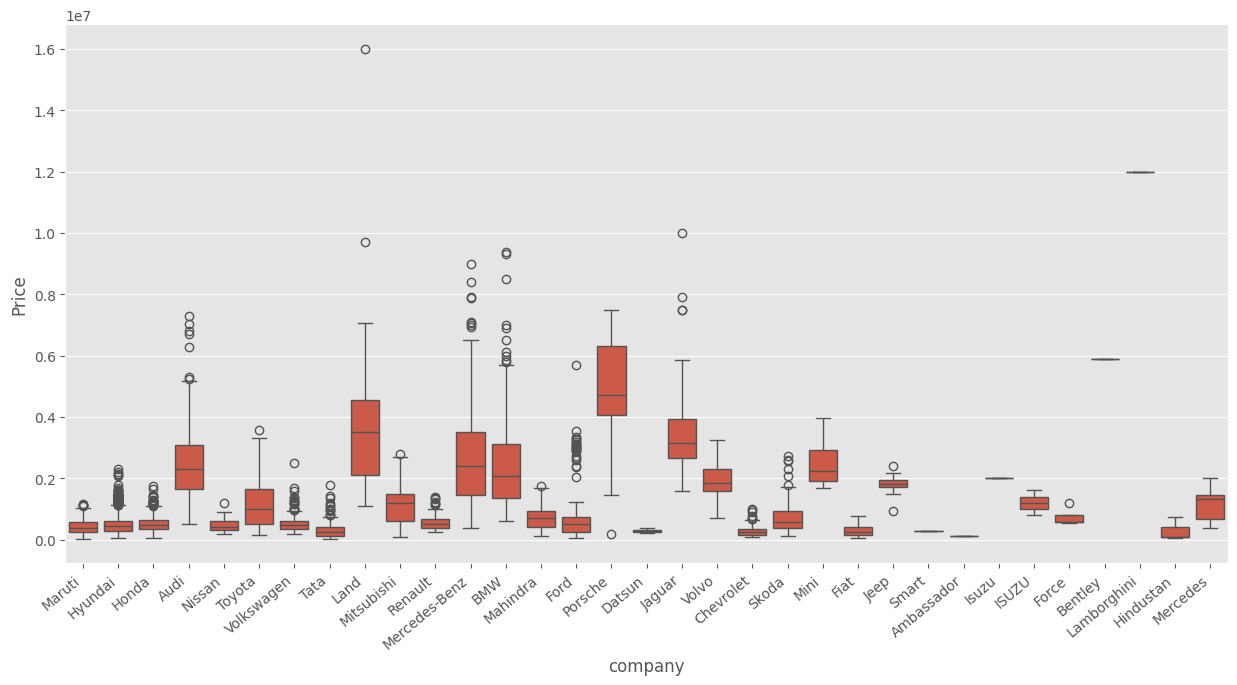

In [109]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 47.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Py

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 71.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Py

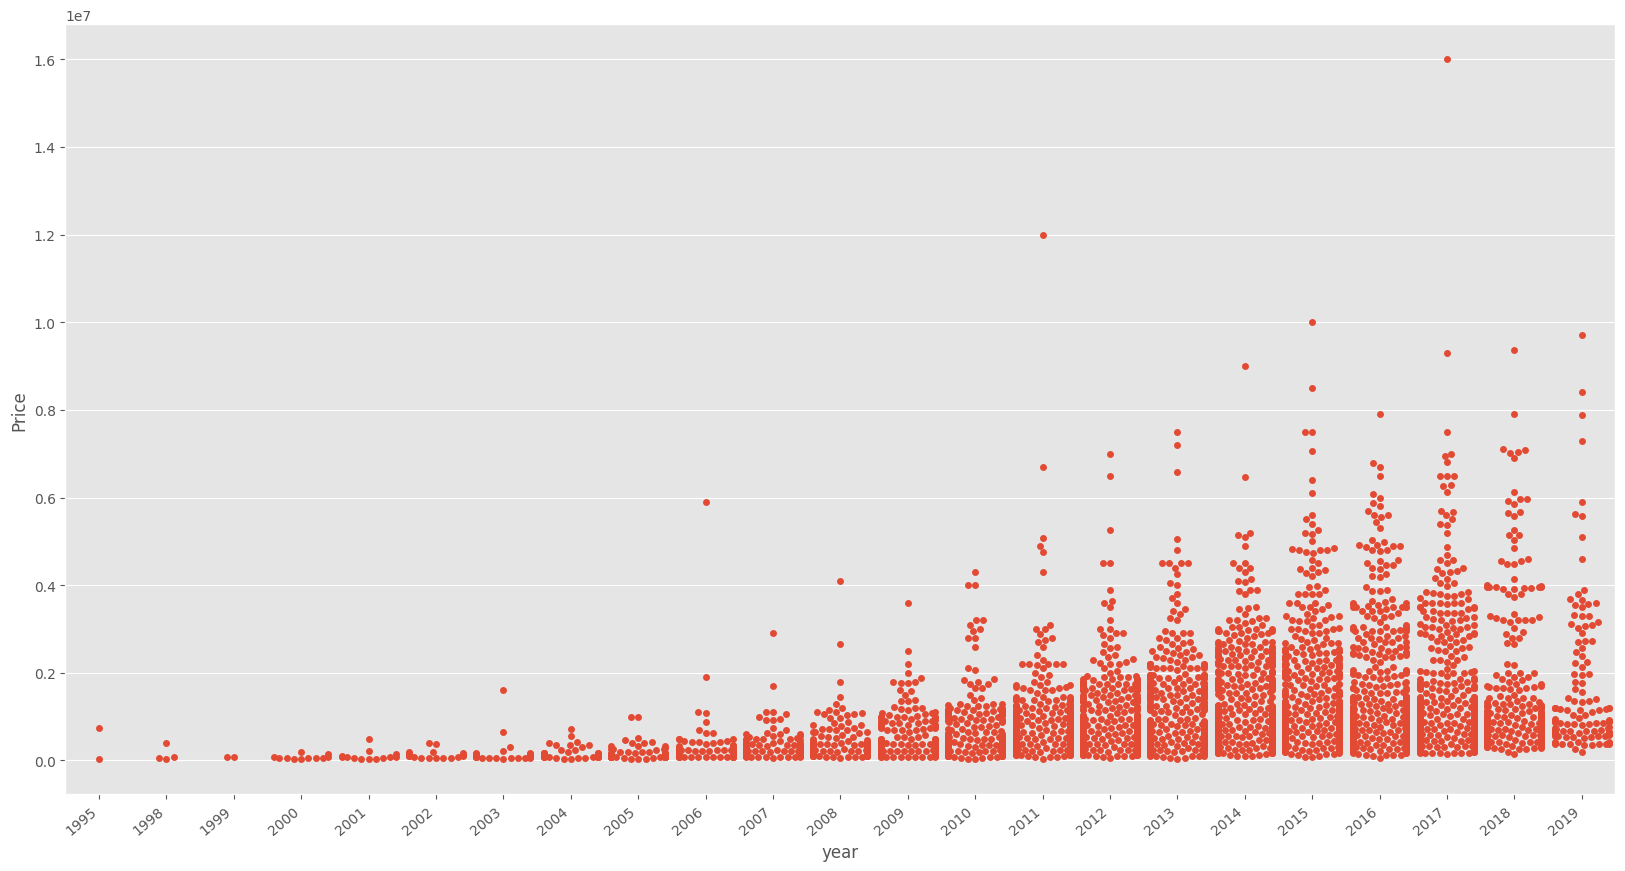

In [110]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()



(<Figure size 1400x700 with 1 Axes>, <Axes: >)

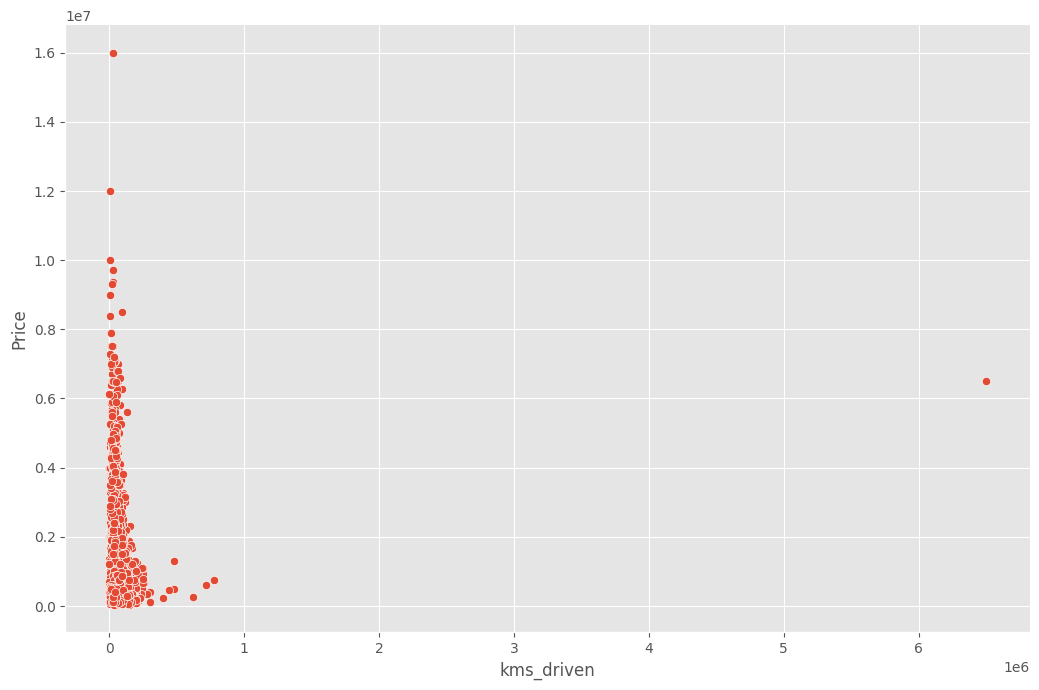

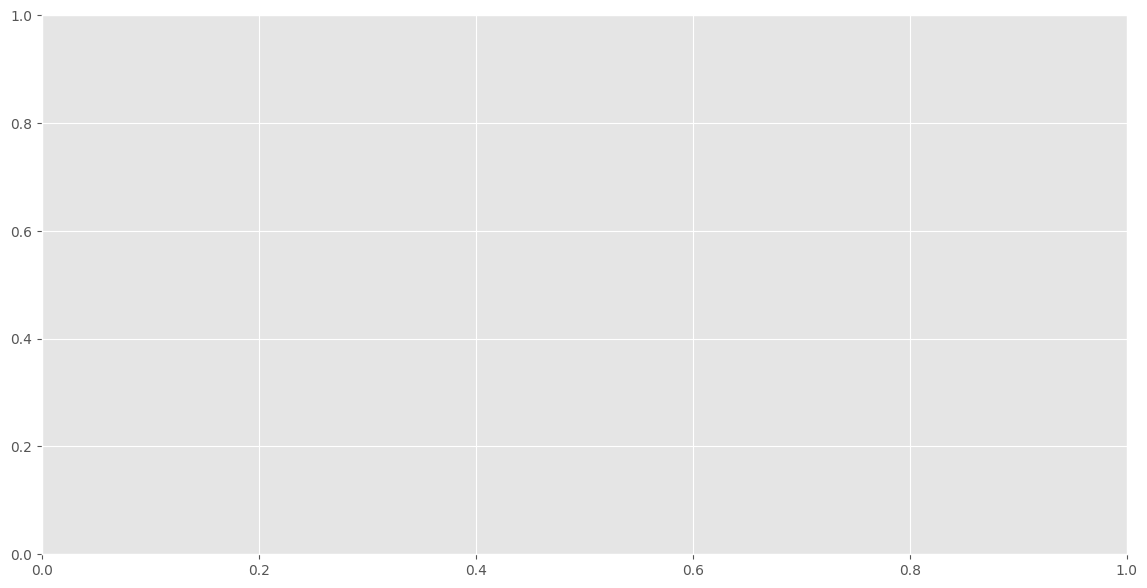

In [111]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)
plt.subplots(figsize=(14,7))


<Axes: xlabel='fuel_type', ylabel='Price'>

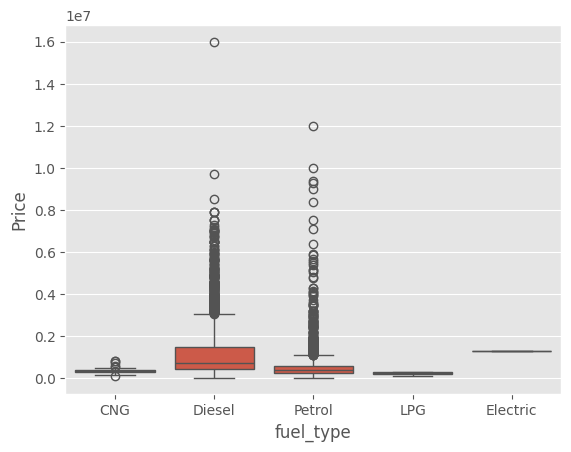

In [112]:
sns.boxplot(x='fuel_type',y='Price',data=car)


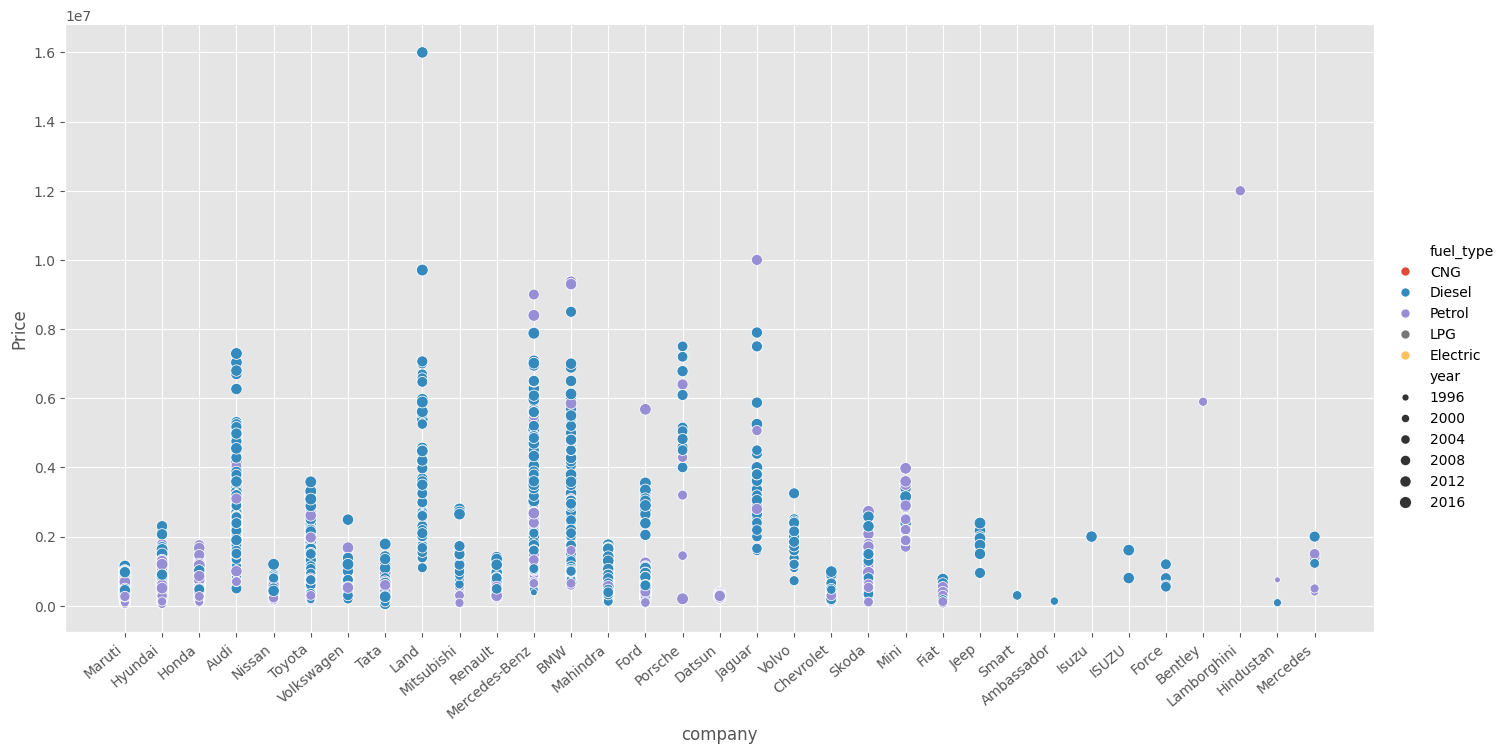

In [113]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')


## Model 1

In [114]:
X = car.drop(columns='Price')
y= car['Price']


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [116]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import  make_column_transformer
from sklearn.pipeline import  make_pipeline

In [117]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','kms_driven']])

OneHotEncoder()

In [118]:
column_trans= make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','kms_driven']),remainder='passthrough')

In [119]:
lr=LinearRegression()

In [120]:
pipe= make_pipeline(column_trans,lr)

In [121]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Classic Nova Diesel', 'Audi A3 35 TDI Attraction',
       'Audi A3 35 TDI Premium', ..., 'Volvo XC60 D5 Inscription',
       'Volvo XC90 2007-2015 D5 AT AWD', 'Volvo XC90 2007-2015 D5 AWD'],
      dtype=object),
                                                                            array(['Ambassador', 'Audi', 'BMW', '...
       'Maruti', 'Mercedes', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object),
                                                                            array([      0,      40,      60, ...,  720000,  775000, 6500000])]),
                                                  ['name', 'company',
                                                   'fuel_type',
                                                   'kms_driven'])])),
                ('linearregression', LinearRegression())])

In [122]:
y_pred = pipe.predict(X_test)
y_pred

array([ 693071.88575517,  387670.07999125, 4168372.23899405, ...,
        290667.98356496,  862611.16675344,  617665.14758307])

In [123]:
r2_score(y_test,y_pred)

0.7785804959204484

In [125]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=i)
    lr=LinearRegression()
    pipe= make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))   
    

In [126]:
scores[np.argmax(scores)]

0.8736738056237245

In [127]:
import pickle


In [128]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [129]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ambassador Classic Nova Diesel', 'Audi A3 35 TDI Attraction',
       'Audi A3 35 TDI Premium', ..., 'Volvo XC60 D5 Inscription',
       'Volvo XC90 2007-2015 D5 AT AWD', 'Volvo XC90 2007-2015 D5 AWD'],
      dtype=object)